In [1]:
import os 
import findspark 


import pyspark
# for sql
from pyspark.sql import SparkSession 
from pyspark.sql.functions import col
from pyspark.sql.functions import sum,avg,max,count
from pyspark import SparkContext

# for time 
import time 
import datetime as dt
from pyspark.sql import functions as F

In [2]:
task1 = "../../data/task1.csv"
task2 = "../../data/task2.csv"
task3 = "../../data/task3.csv"
task4 = "../../data/task4.csv"
task5 = "../../data/task5.csv"

In [3]:
# Initialize SparkSession with 8 cores and 8GB of RAM
# spark = SparkSession.builder \
#     .appName("eCommerce") \
#     .master("local[8]") \
#     .config("spark.executor.memory", "8g") \
#     .config("spark.driver.memory", "8g") \
#     .getOrCreate()

spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[*]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()
 
 
 #.master("local[*]")這個設定讓 Spark 使用所有可用的核心。





# Data Scalability

## Task 1 is 1,000 rows data

In [4]:
# Read CSV file
df_task1 = spark.read.csv(task1, header=True, inferSchema=True)

In [5]:
# Show the data (for example, the first 5 rows)
df_task1.show(5)

+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 02:00:00|      view|  44600062|2103807459595387724|                NULL|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 02:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 02:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    NULL|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 02:00:01|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 02:00:04|      view|   1004237|2053013555631882655|electr

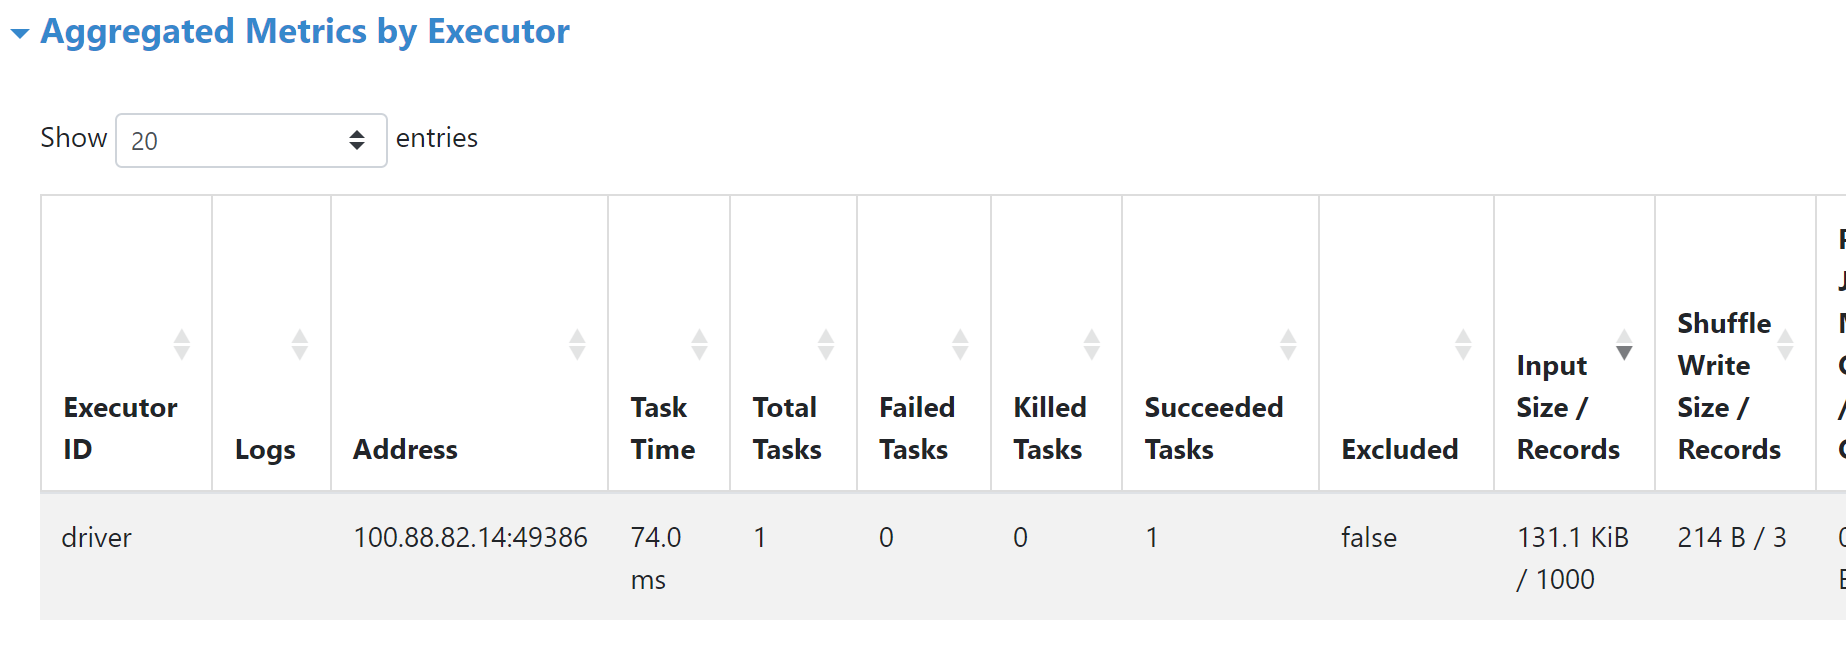

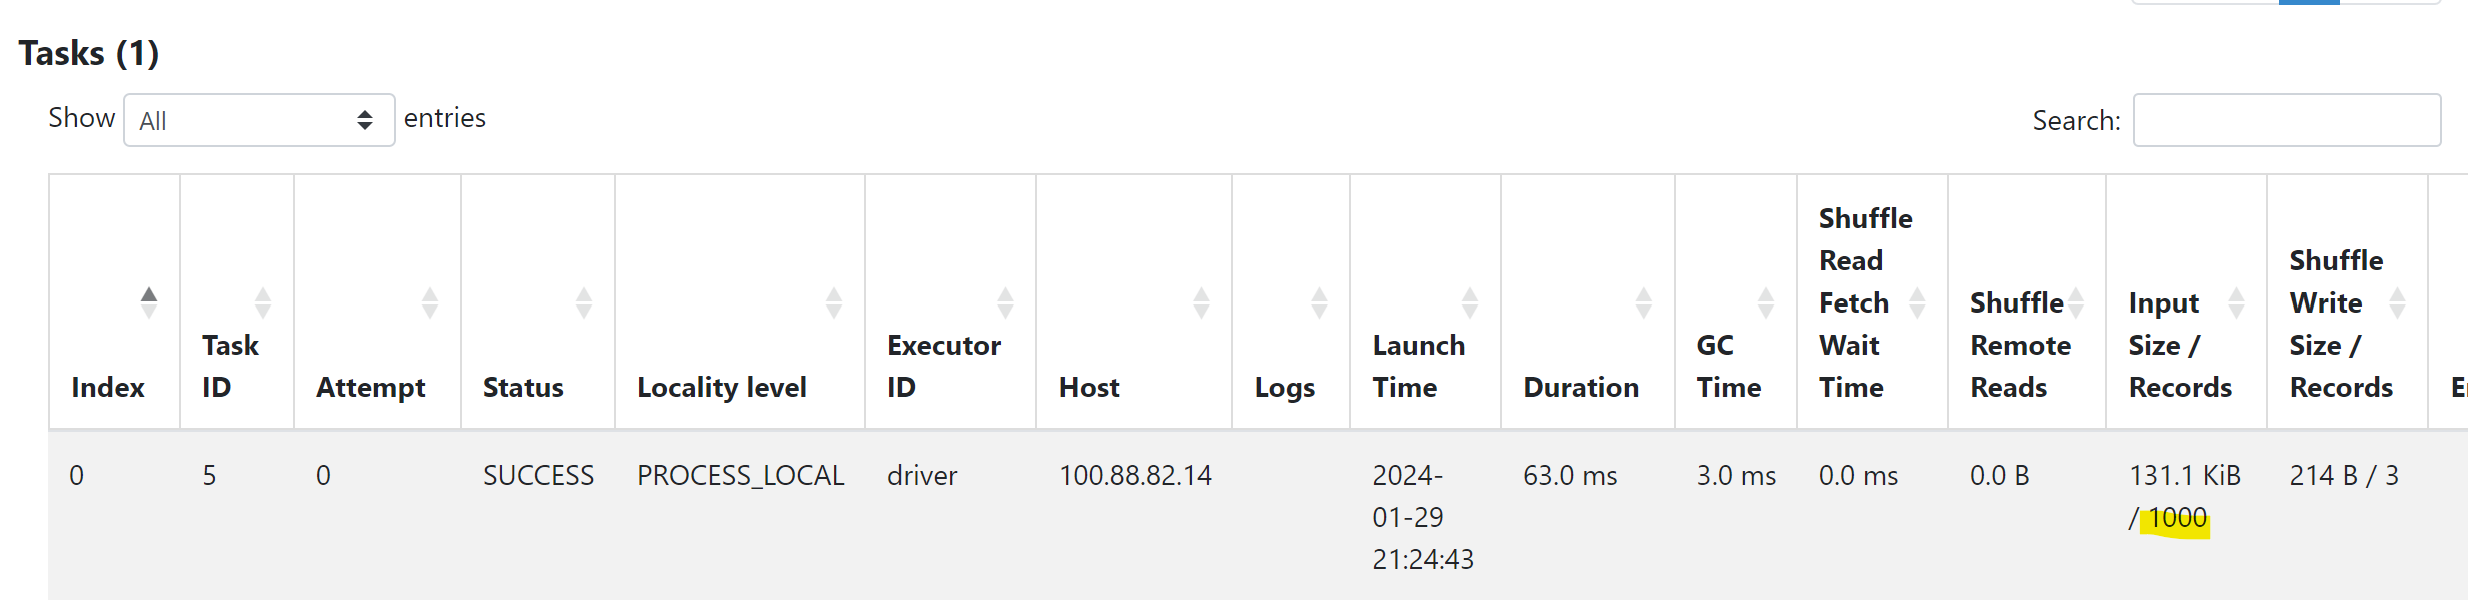

In [7]:
task1_groupby = df_task1.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase|   10|
|      view|  987|
|      cart|    3|
+----------+-----+



## Task 2 is 10,000 rows data

In [8]:
# Read CSV file
df_task2 = spark.read.csv(task2, header=True, inferSchema=True)


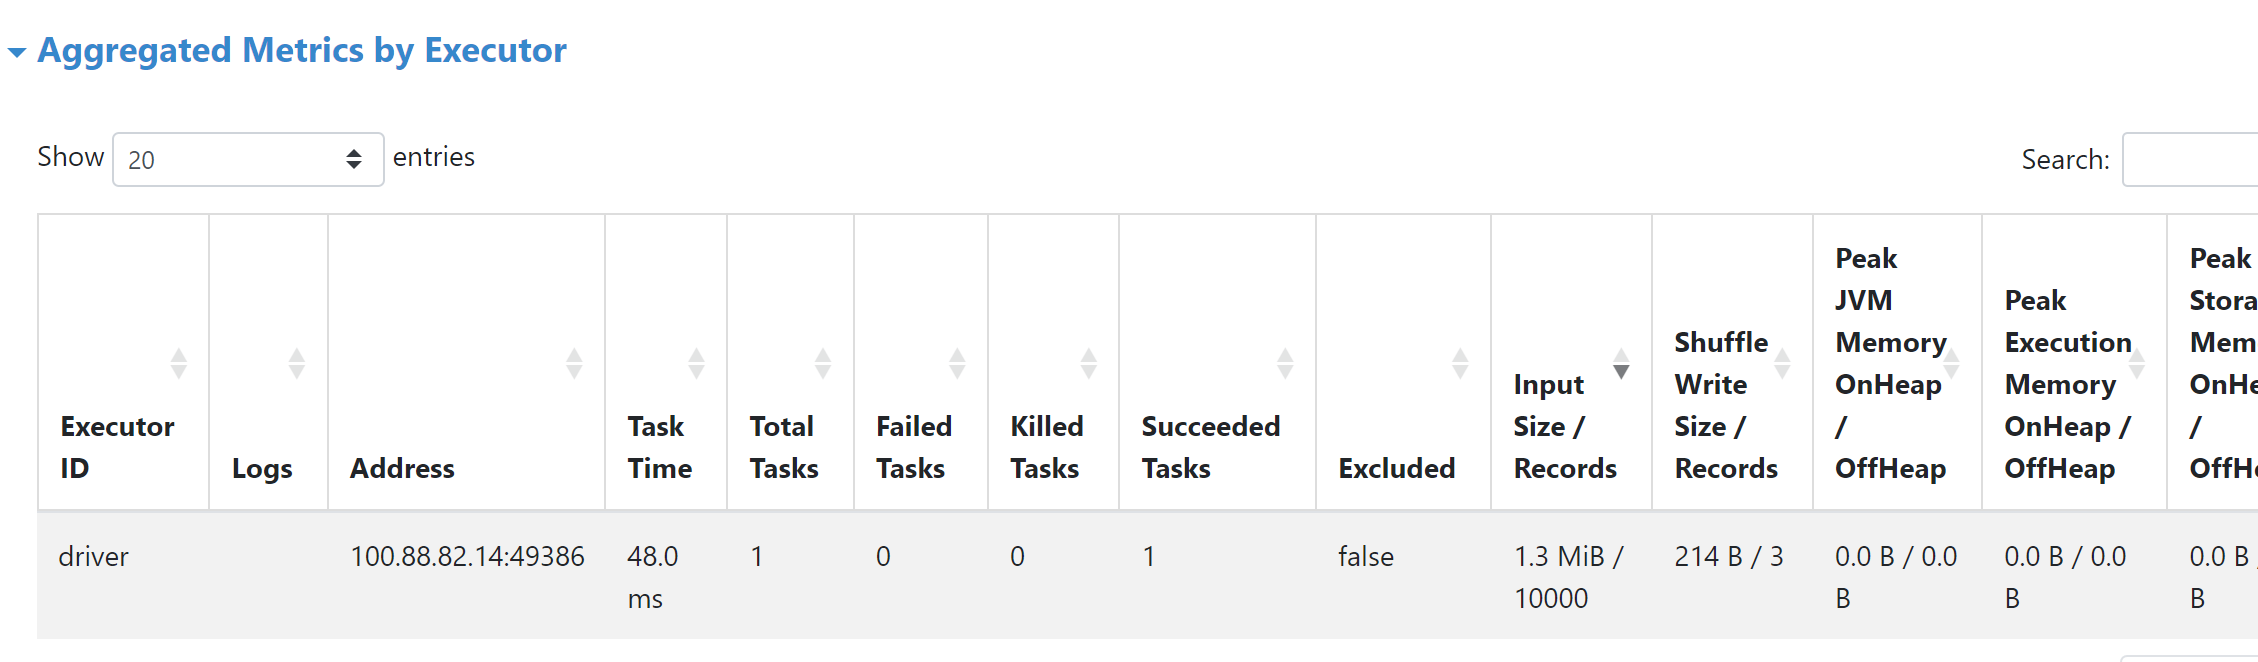

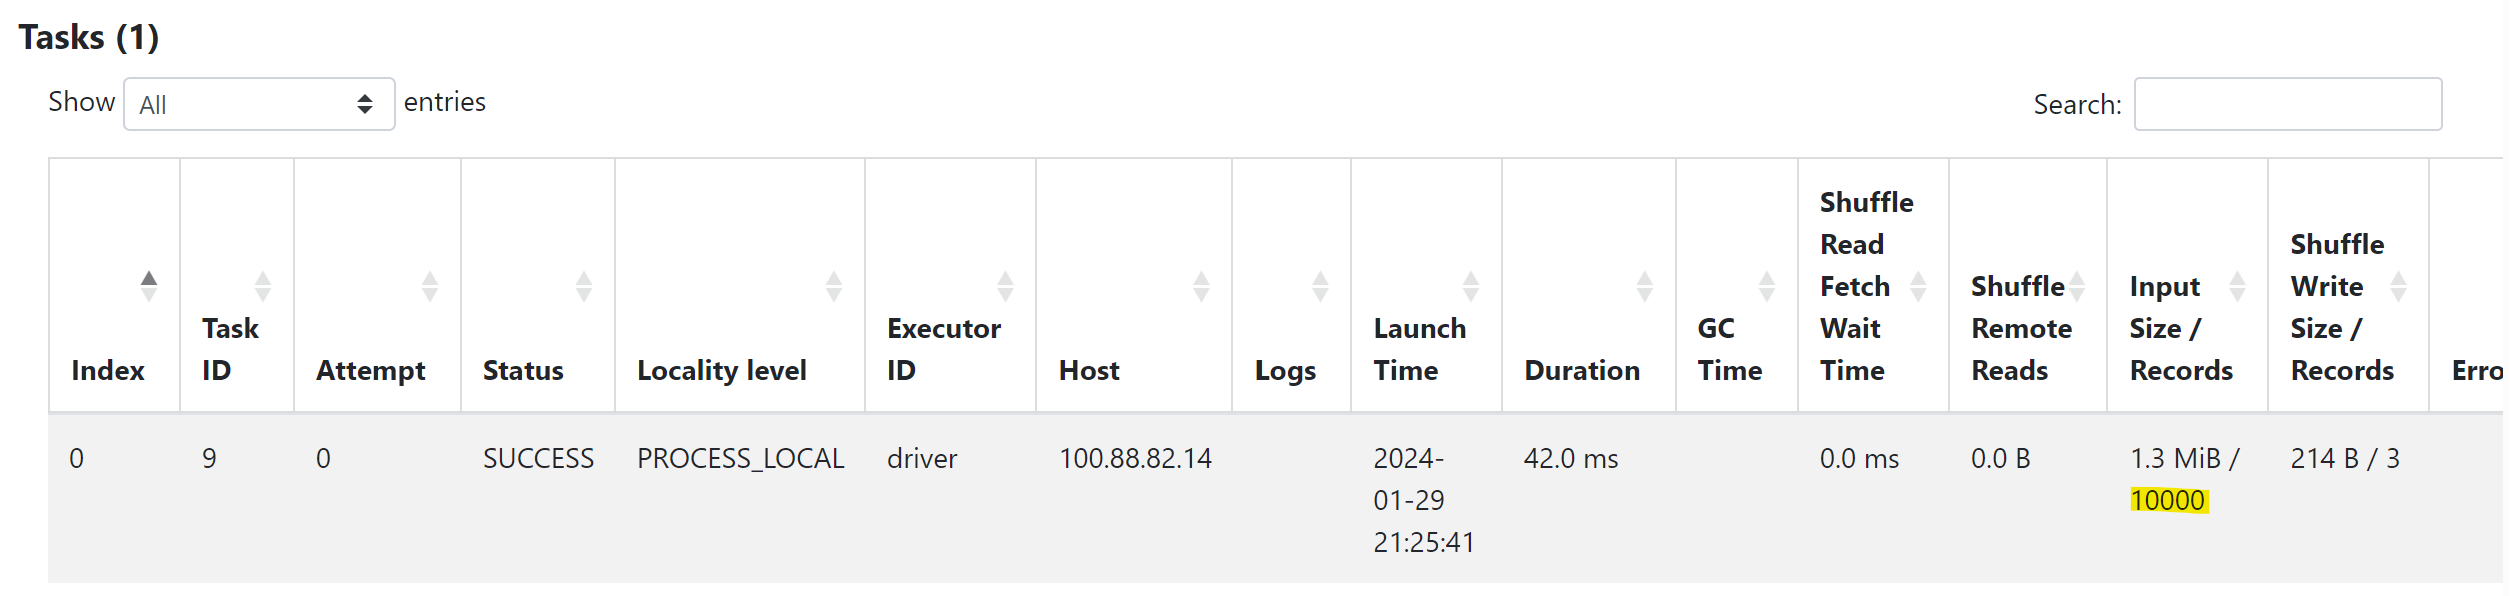

In [9]:
task2_groupby = df_task2.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase|  118|
|      view| 9785|
|      cart|   97|
+----------+-----+



## Task 3 is 100,000 rows data

In [10]:
# Read CSV file
df_task3 = spark.read.csv(task3, header=True, inferSchema=True)


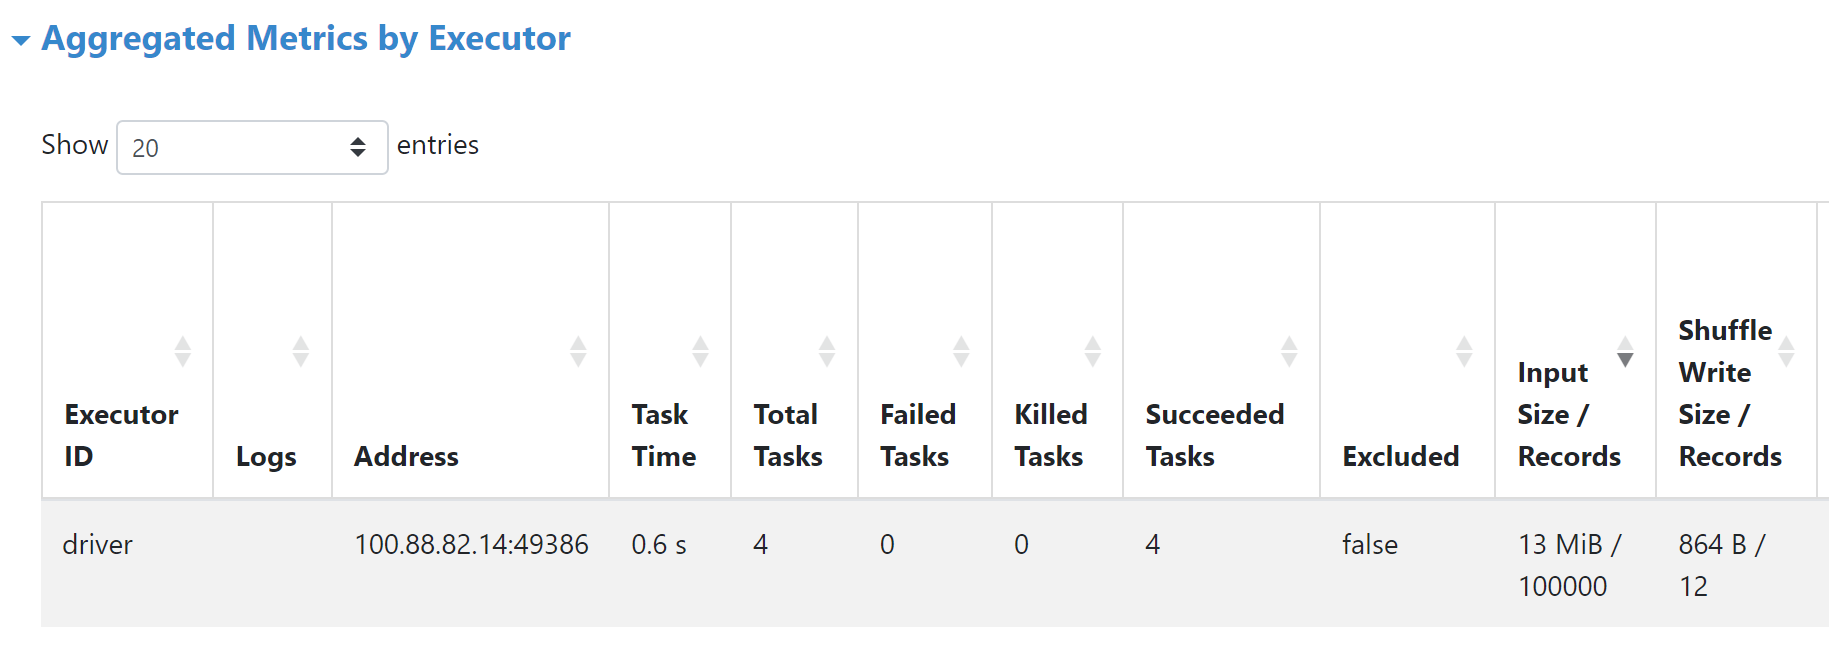

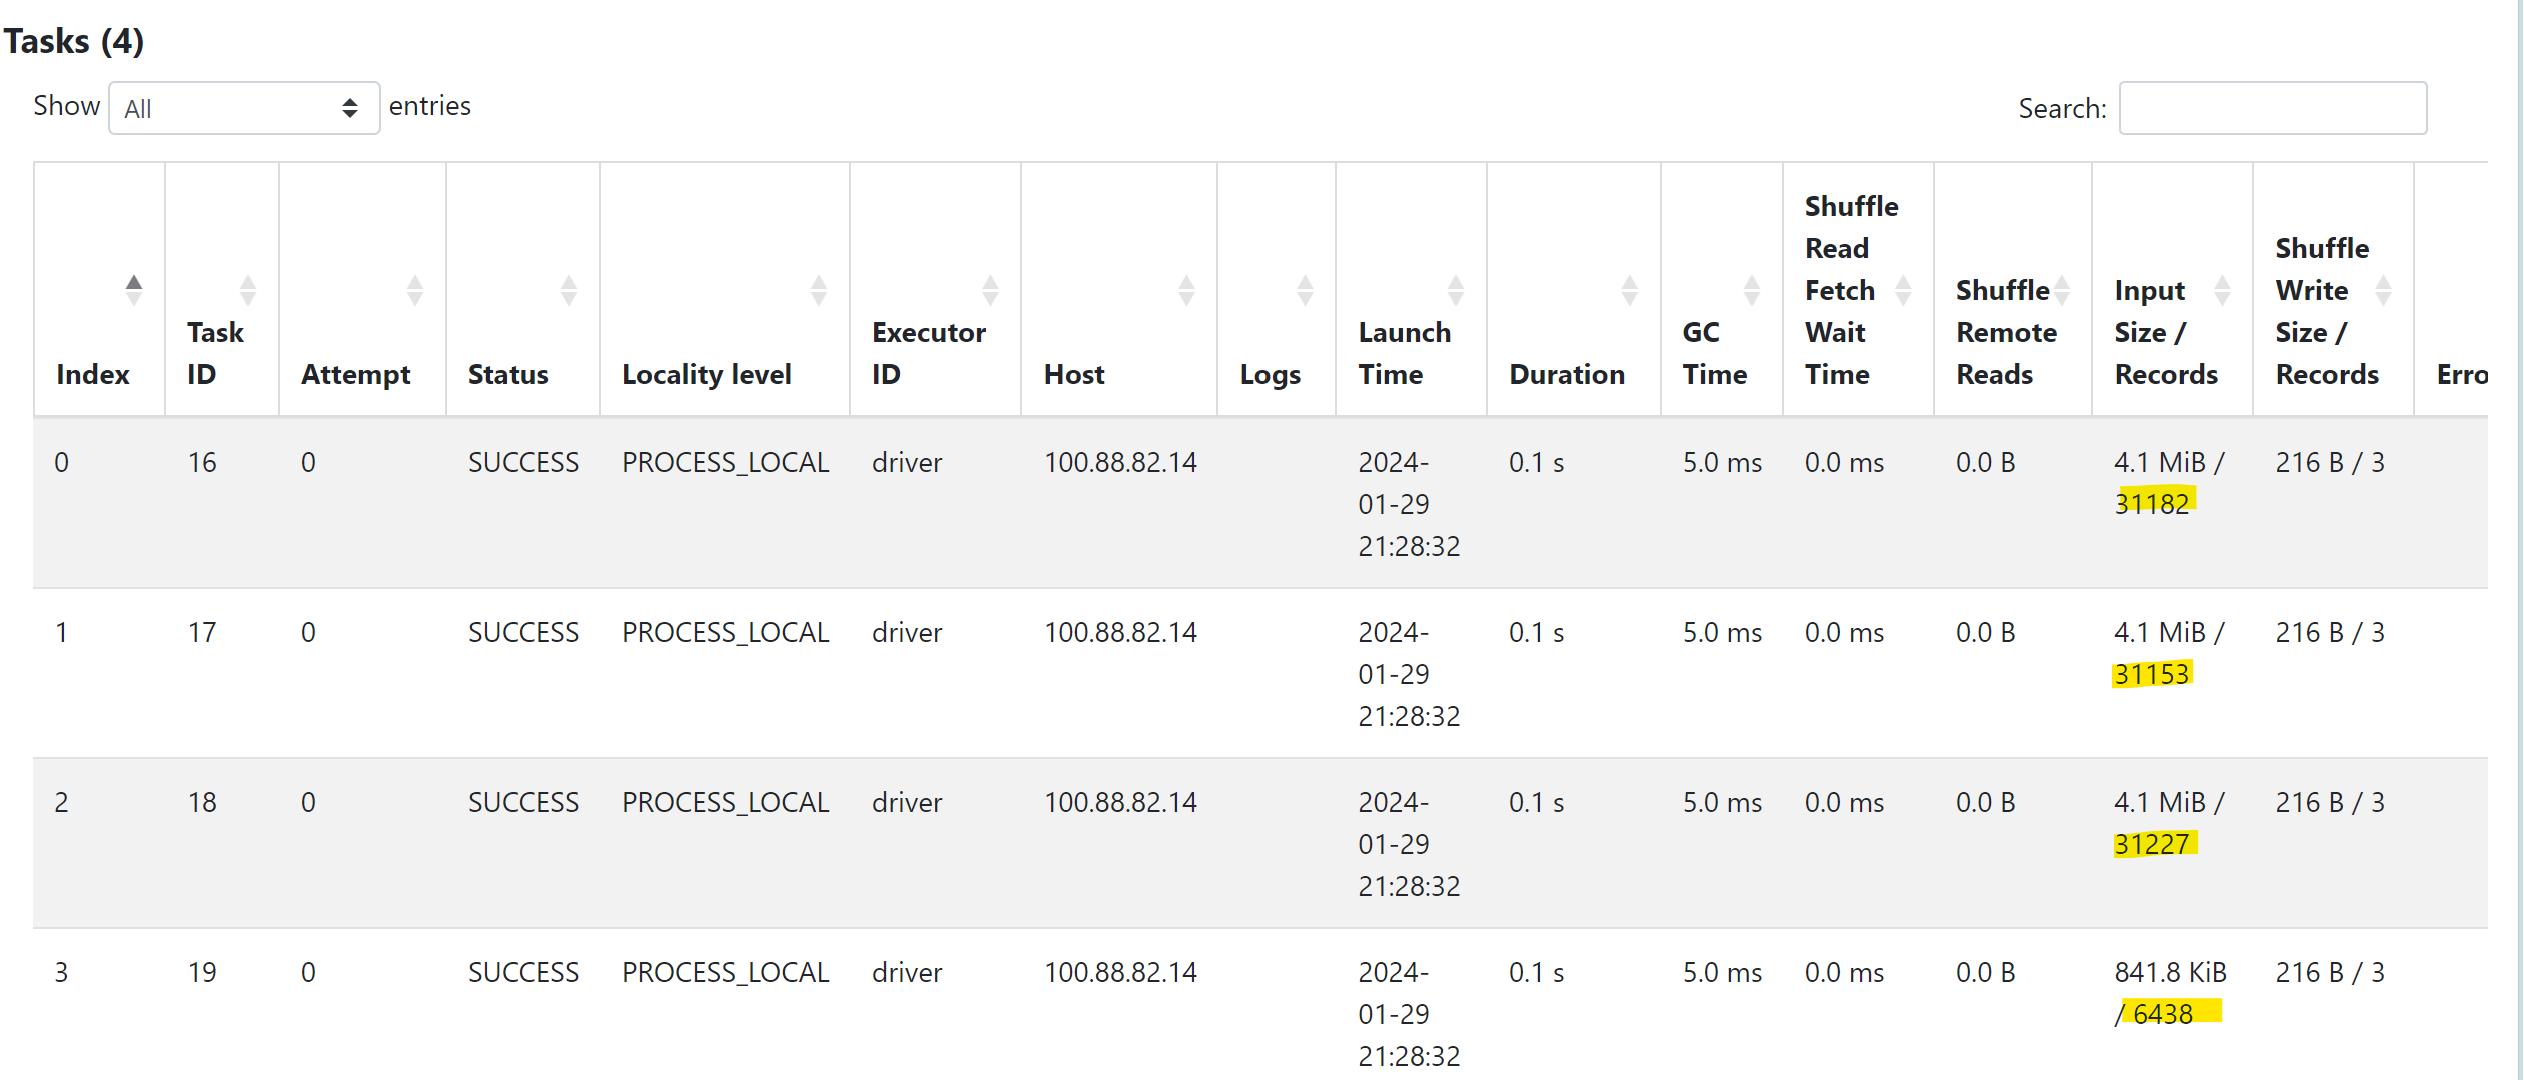

In [11]:
task3_groupby = df_task3.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase| 1655|
|      view|97130|
|      cart| 1215|
+----------+-----+



## Task 4 is 1,000,000 rows data

In [13]:
# Read CSV file
df_task4 = spark.read.csv(task4, header=True, inferSchema=True)

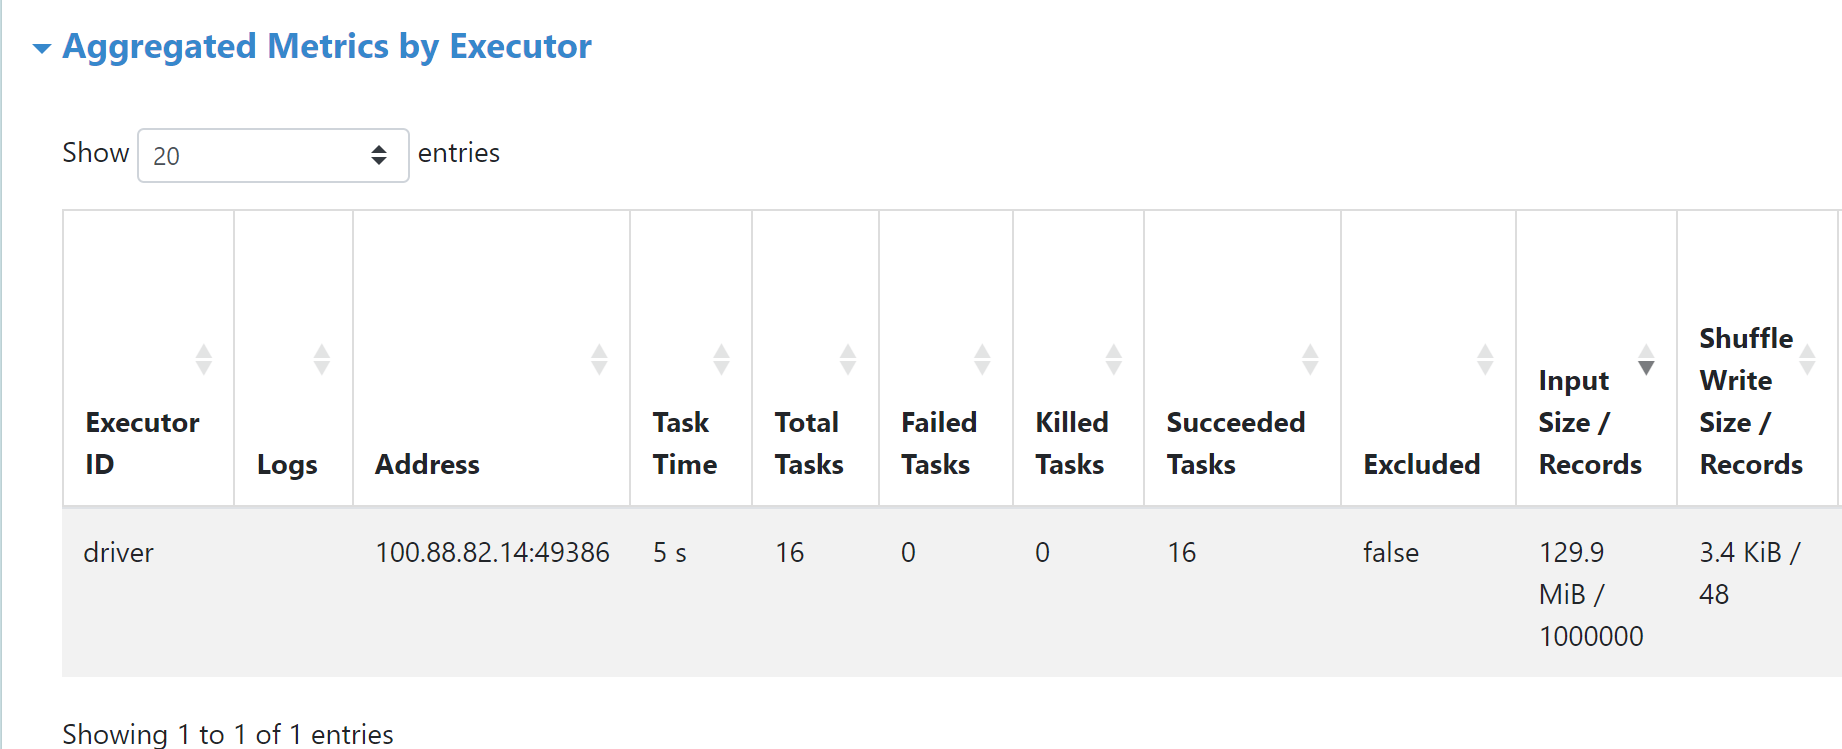

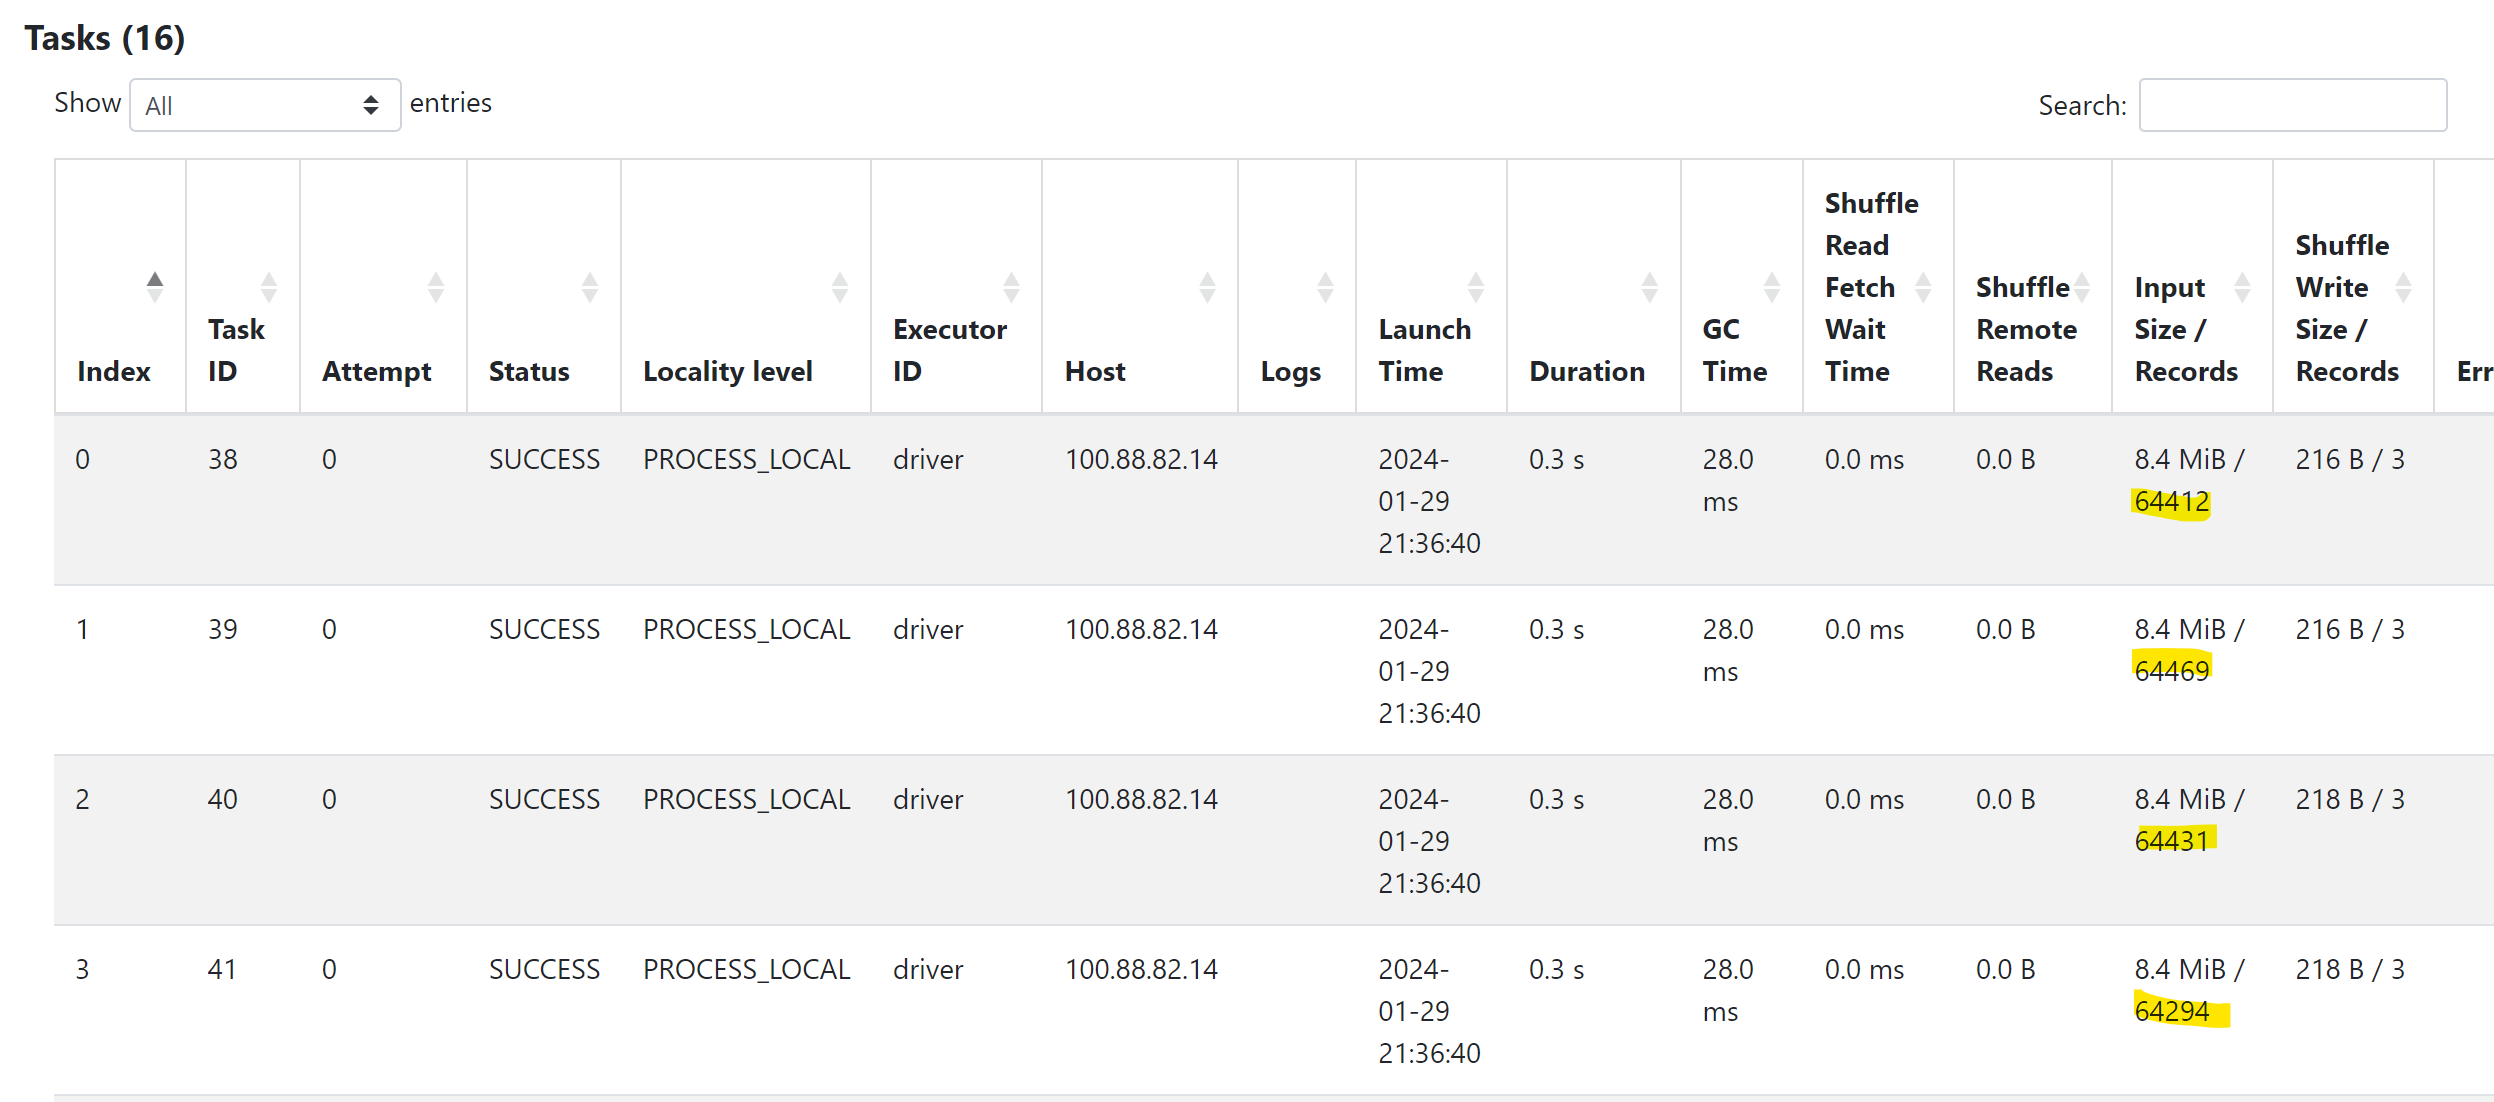

In [14]:
task4_groupby = df_task4.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+------+
|event_type| count|
+----------+------+
|  purchase| 16848|
|      view|968513|
|      cart| 14639|
+----------+------+



## Task 5 is 10,000,000 rows data

In [15]:
# Read CSV file
df_task5 = spark.read.csv(task5, header=True, inferSchema=True)

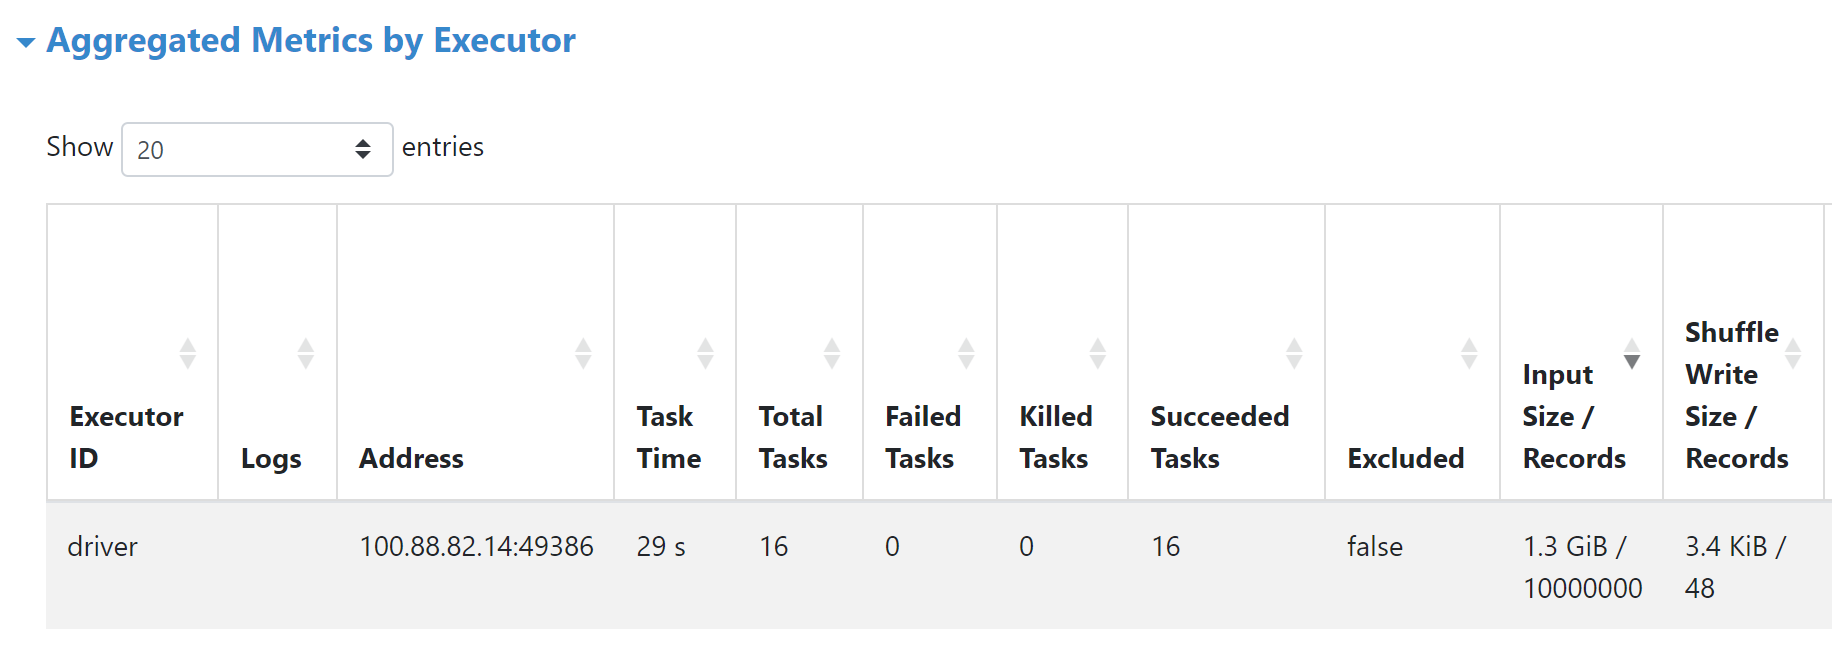

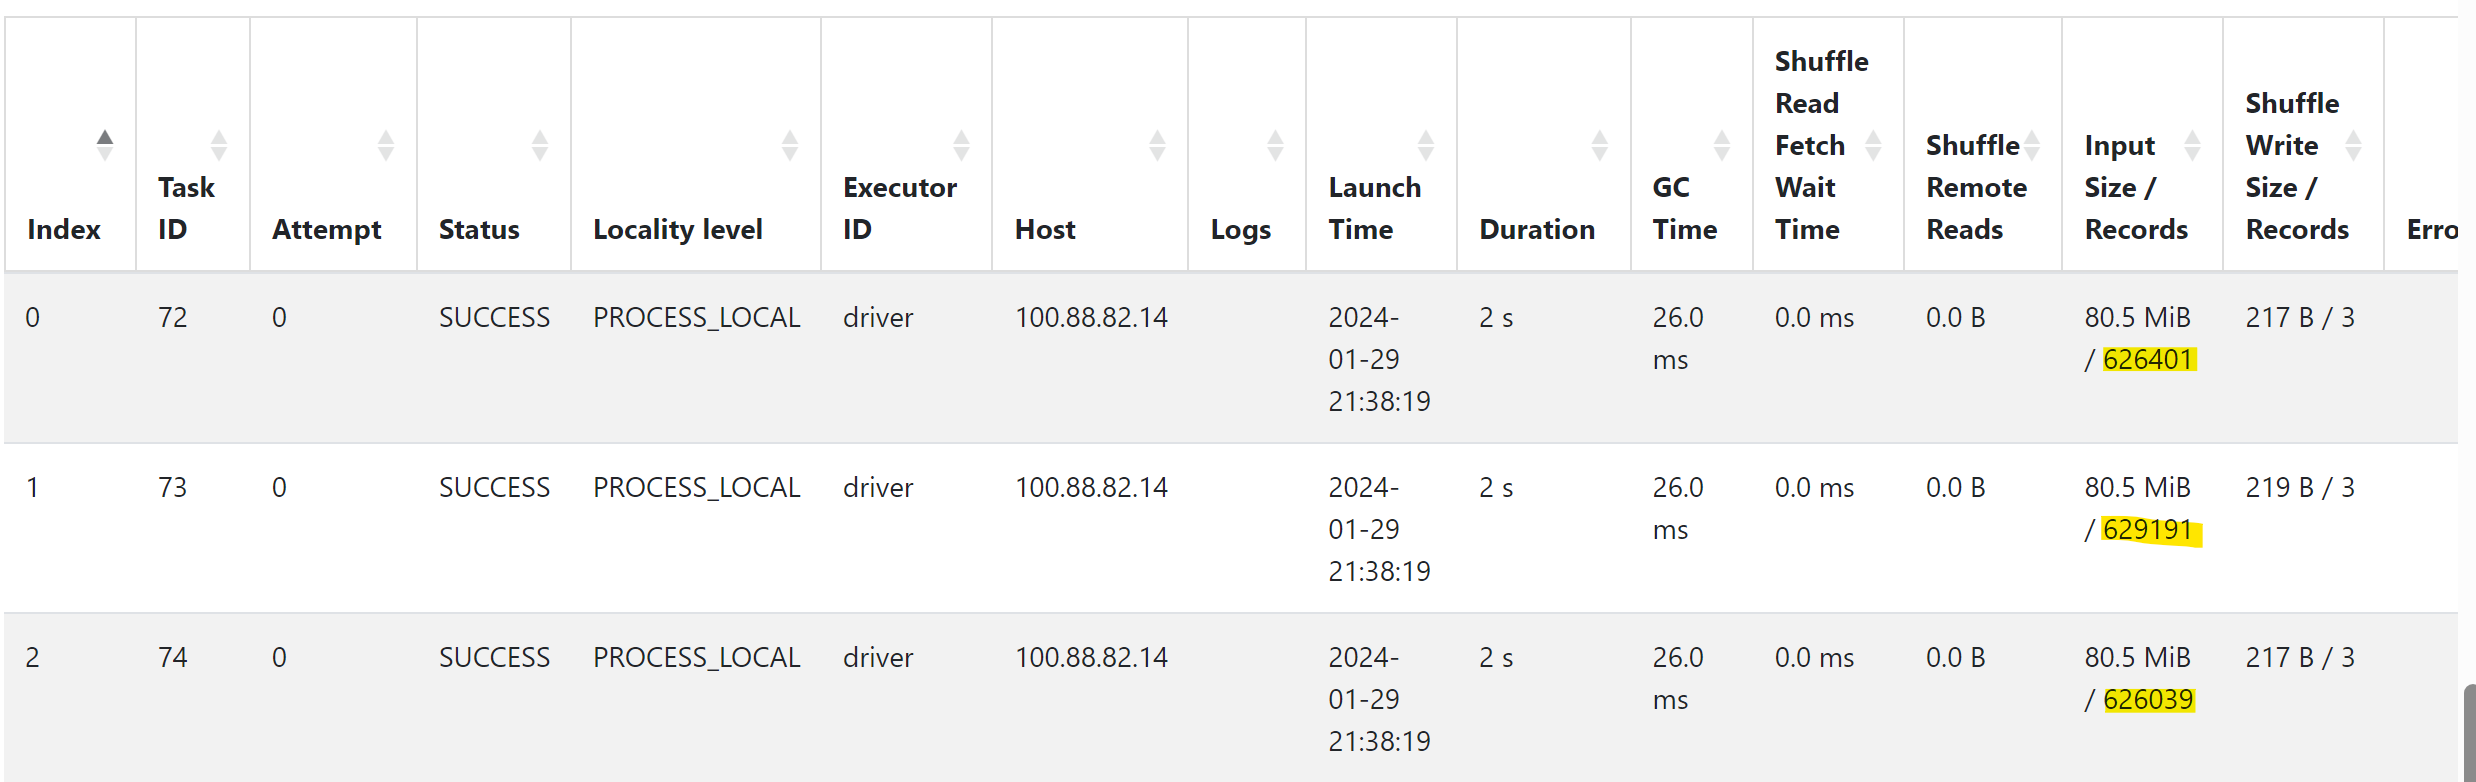

In [16]:
task5_groupby = df_task5.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-------+
|event_type|  count|
+----------+-------+
|  purchase| 172826|
|      view|9627820|
|      cart| 199354|
+----------+-------+



# Hardware Scalability

## Initialize SparkSession with 4 cores and 16GB of RAM

In [3]:

spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[4]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()
 

In [4]:
# Read CSV file
df_task5 = spark.read.csv(task5, header=True, inferSchema=True)

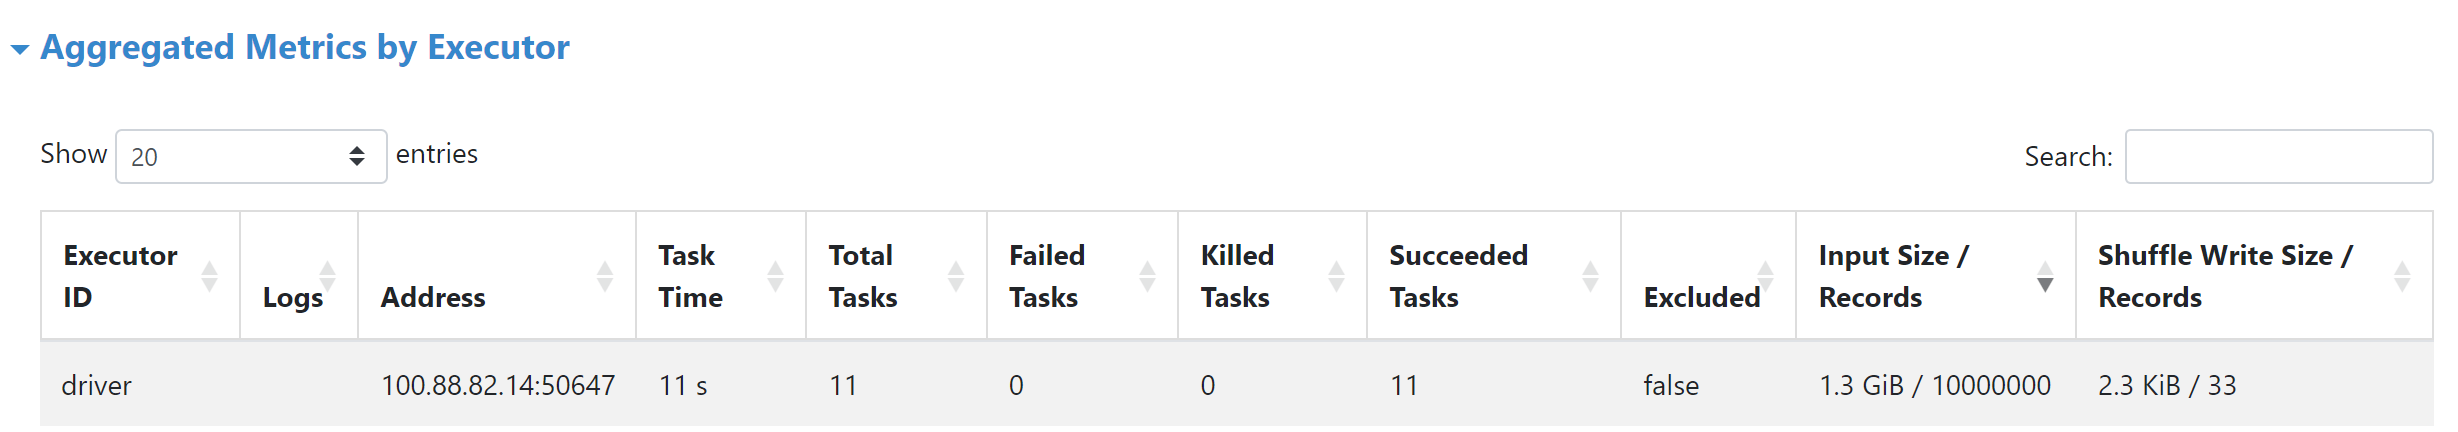

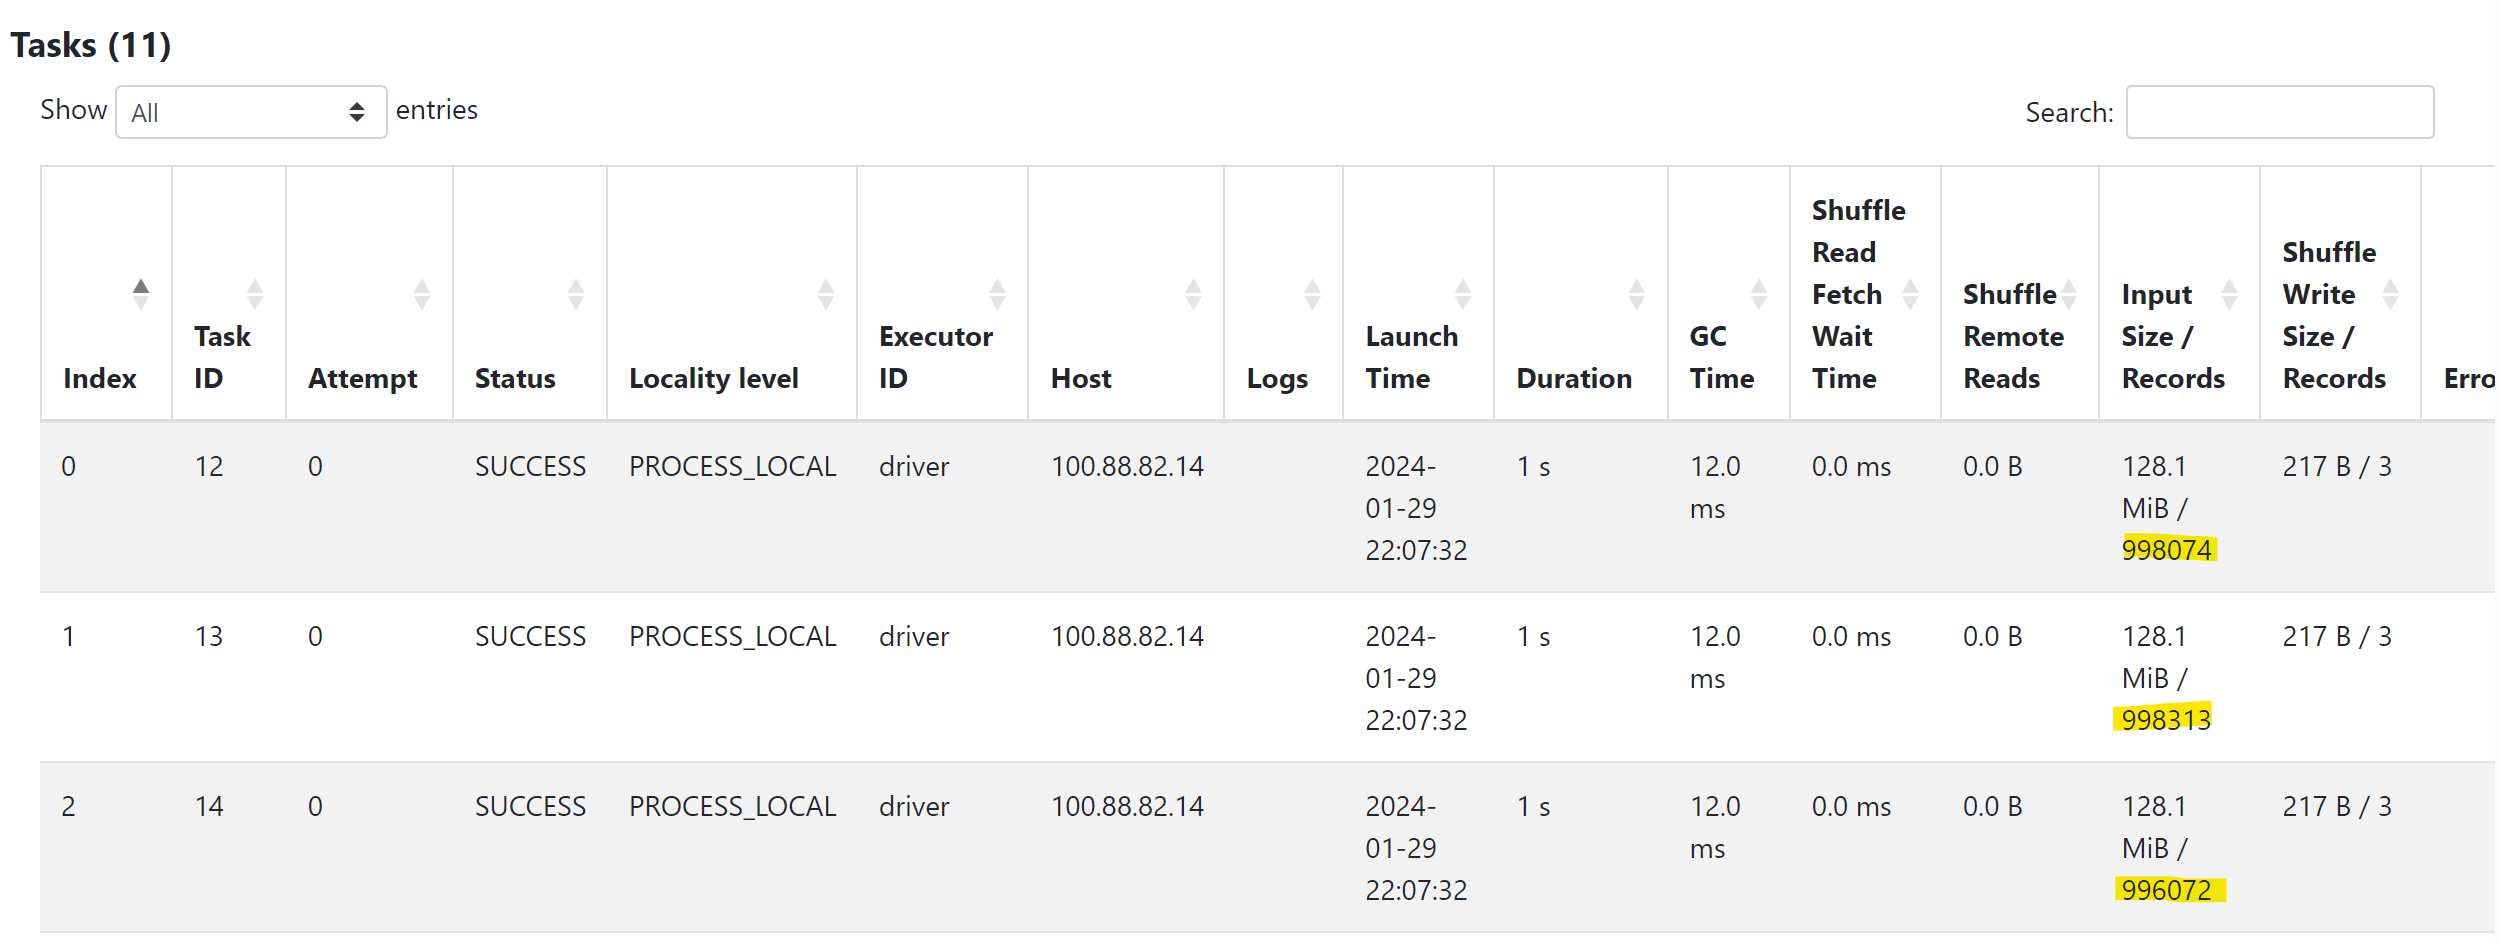

In [5]:
task5_groupby = df_task5.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-------+
|event_type|  count|
+----------+-------+
|  purchase| 172826|
|      view|9627820|
|      cart| 199354|
+----------+-------+



## Initialize SparkSession with 16 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[16]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()

In [4]:
# Read CSV file
df_task5 = spark.read.csv(task5, header=True, inferSchema=True)

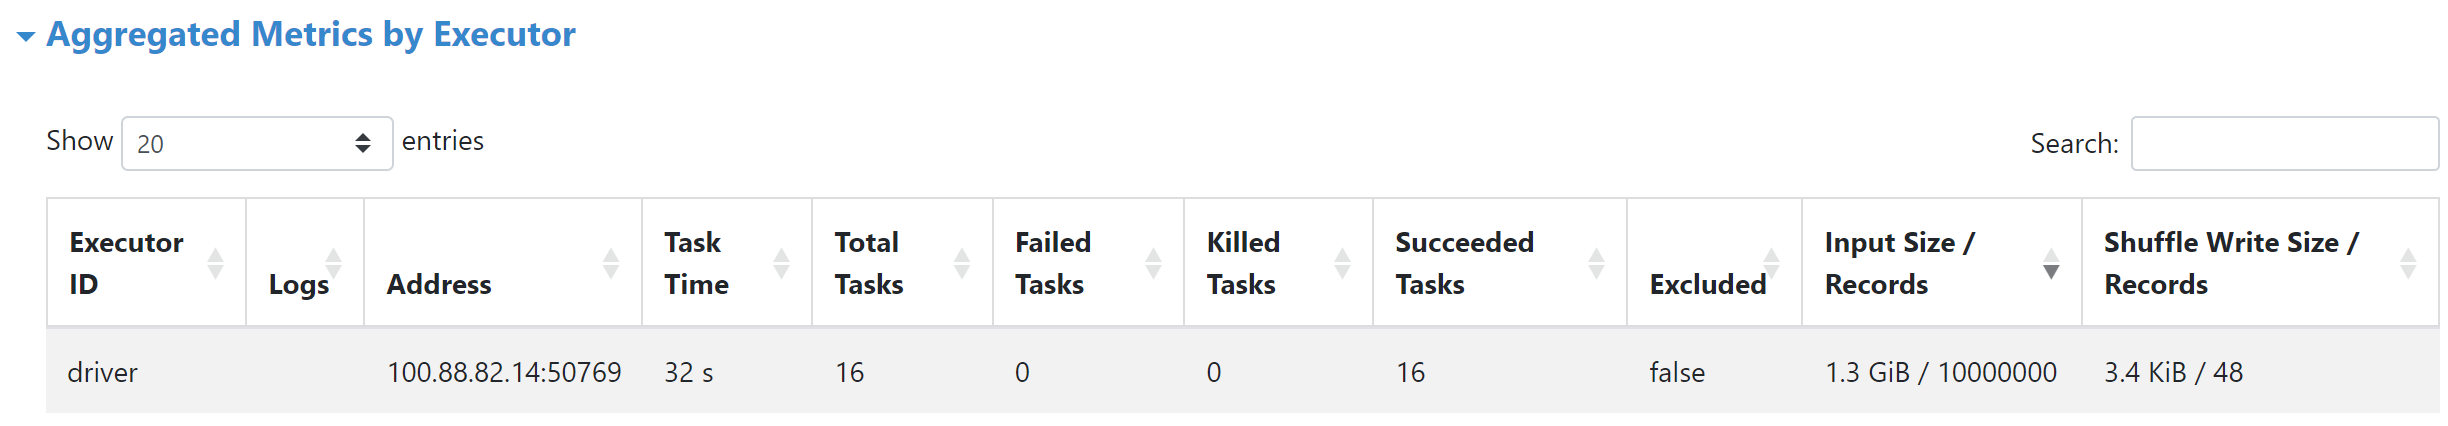

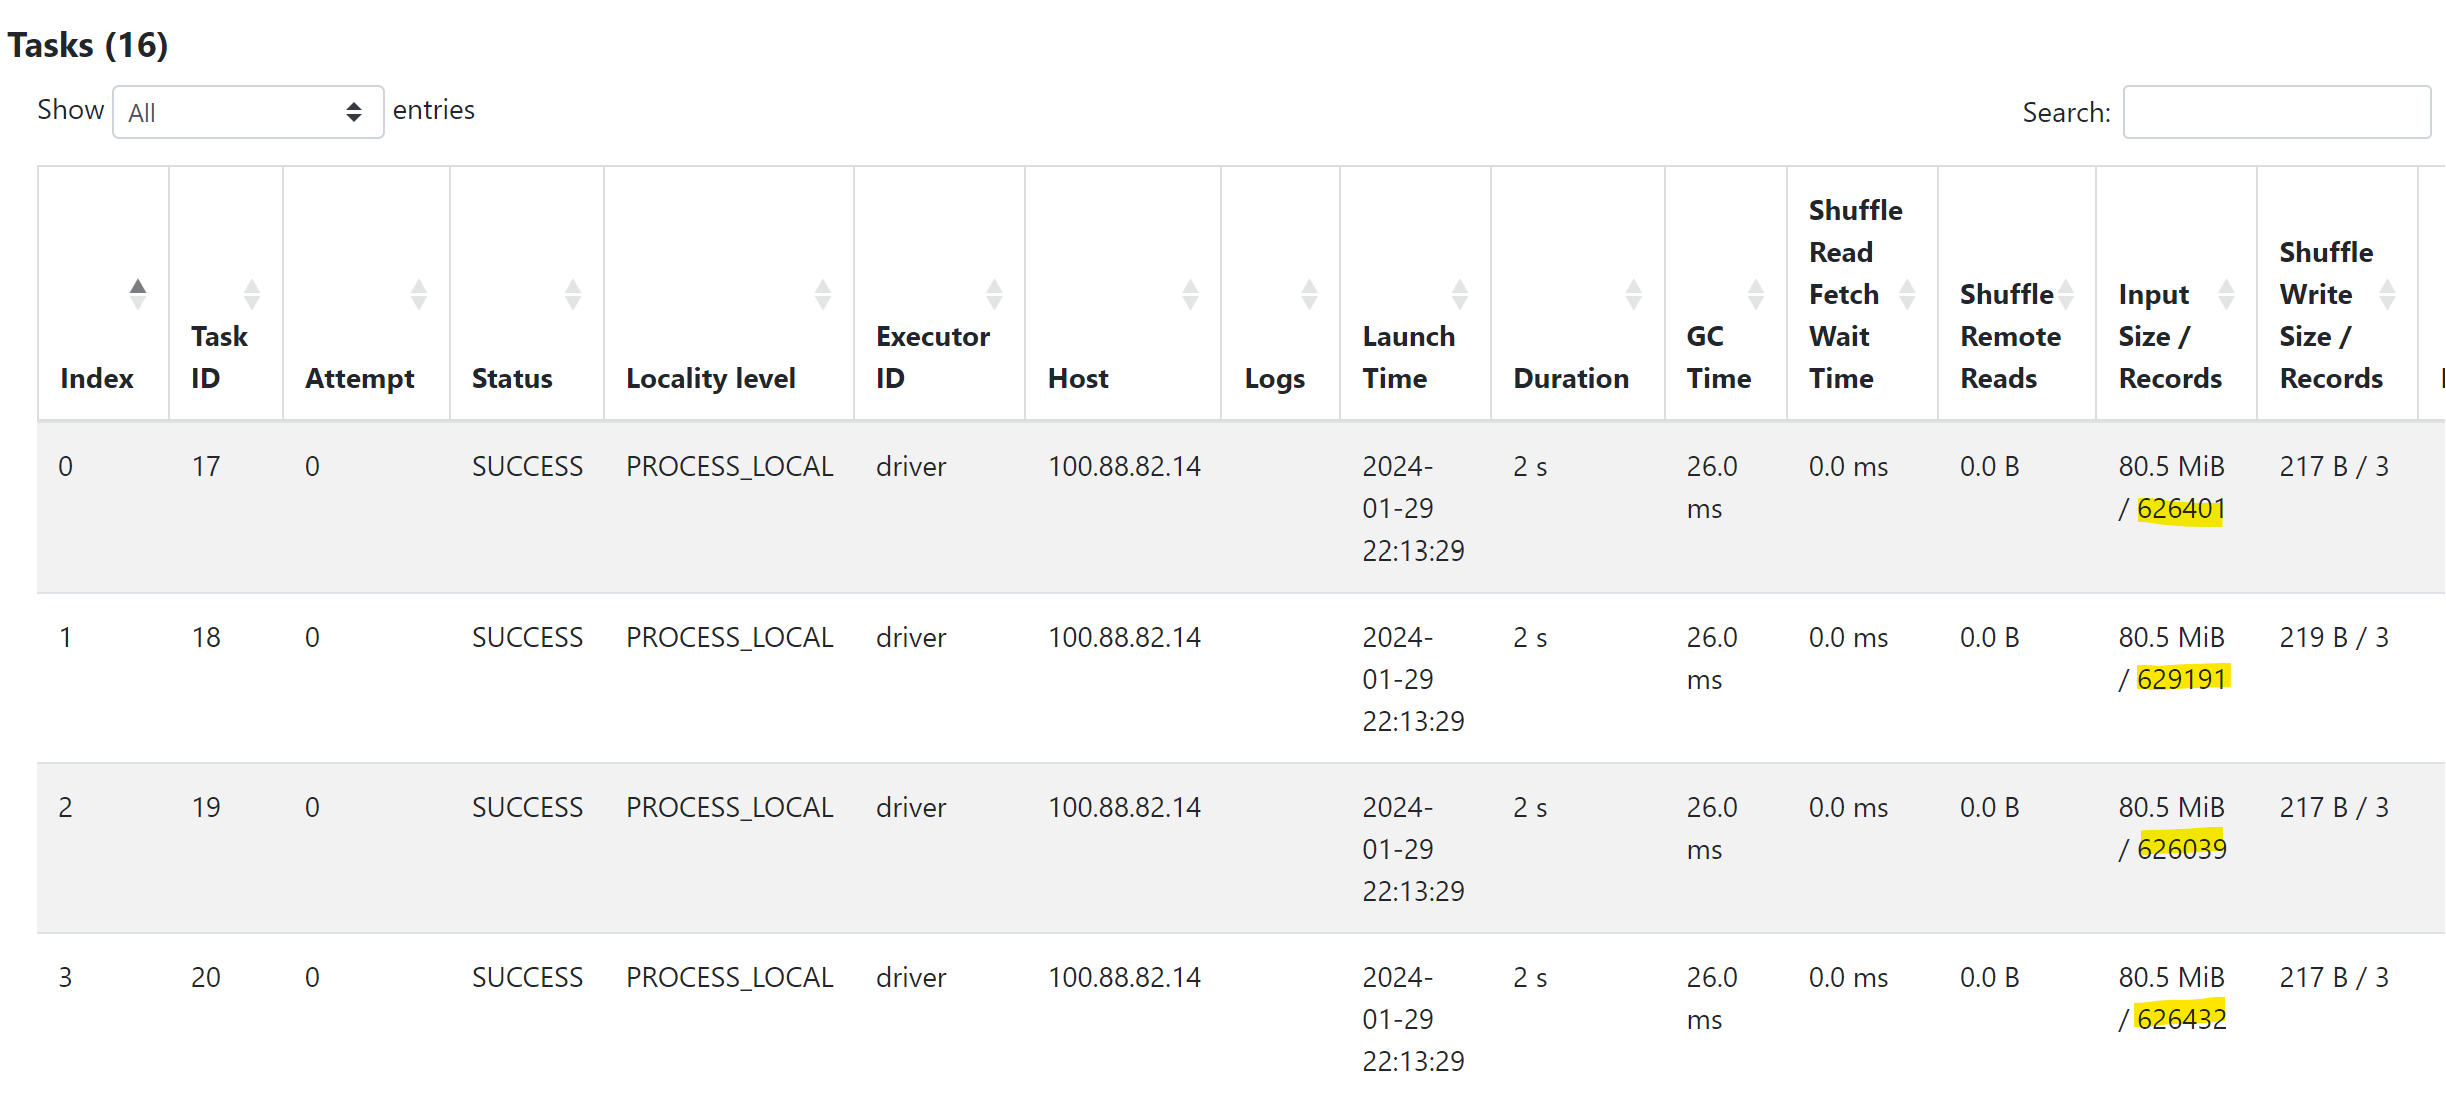

In [5]:
task5_groupby = df_task5.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-------+
|event_type|  count|
+----------+-------+
|  purchase| 172826|
|      view|9627820|
|      cart| 199354|
+----------+-------+



## Initialize SparkSession with 16 cores and 4GB of RAM

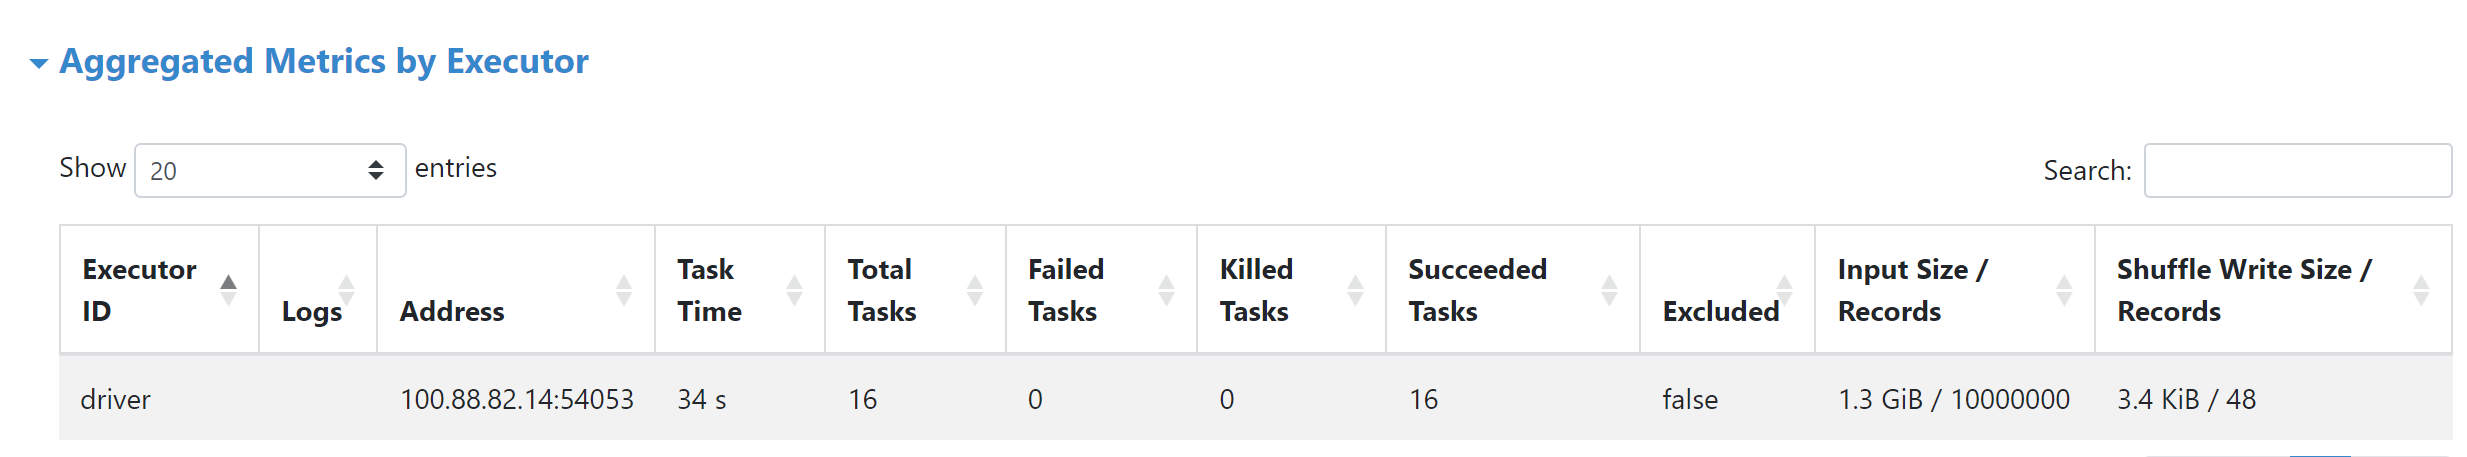

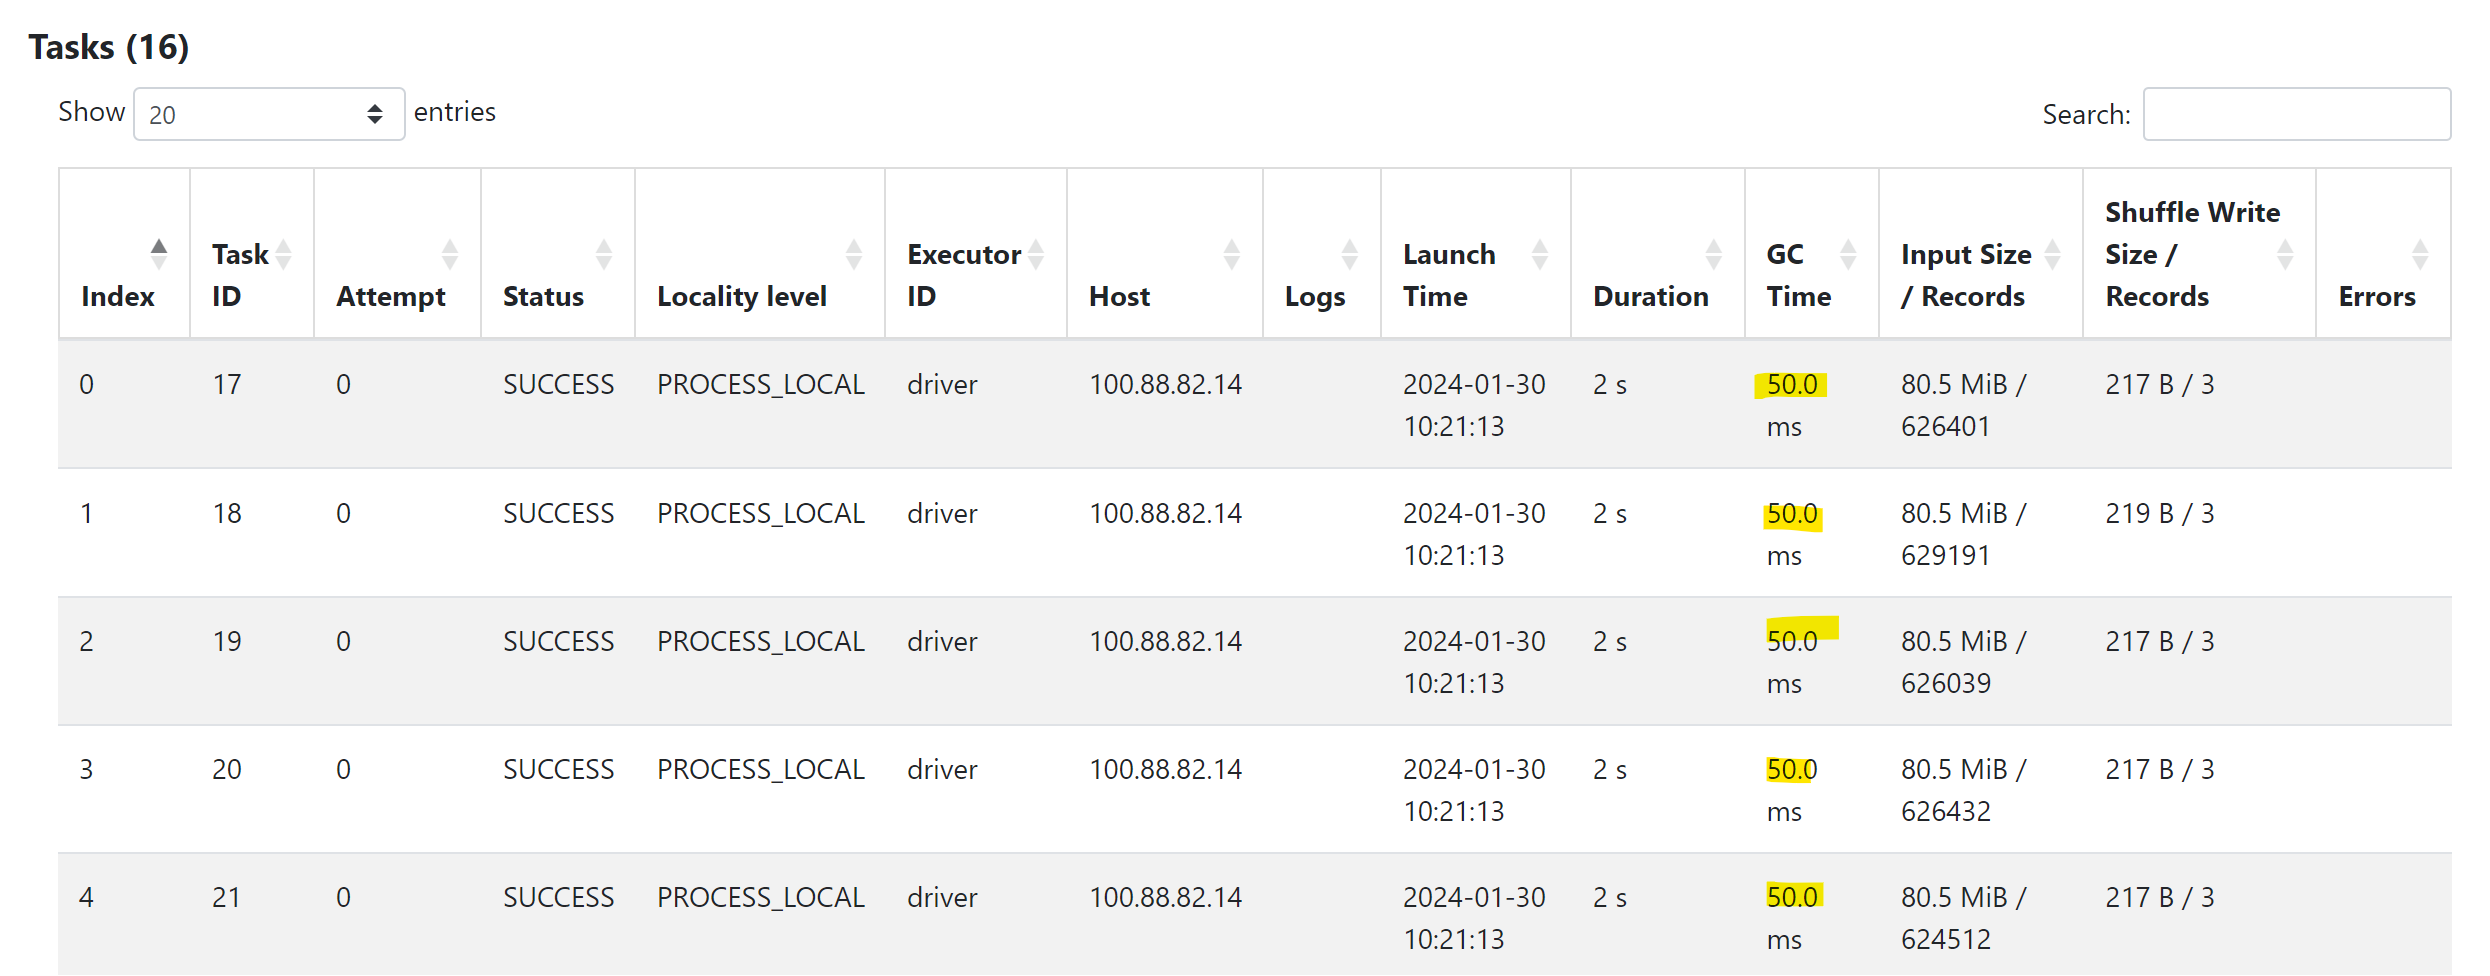

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[16]") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

In [4]:
# Read CSV file
df_task5 = spark.read.csv(task5, header=True, inferSchema=True)

In [5]:
task5_groupby = df_task5.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-------+
|event_type|  count|
+----------+-------+
|  purchase| 172826|
|      view|9627820|
|      cart| 199354|
+----------+-------+



- Long GC times are usually due to insufficient memory
- The process of automatic memory management. When the objects in the program are no longer needed, the GC process will automatically release the memory.
